In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pymc as pm

In [8]:
def zero_inf_gamma(size, shape, scale, perc):
    
    ran = np.where(np.random.rand(size) < perc, 0, 1)
    gam = np.random.gamma(shape, scale)

    return gam * ran

def zero_inf_gauss(size, mu, sigma, perc):
    
    ran = np.where(np.random.rand(size) < perc, 0, 1)
    gam = np.random.normal(mu, sigma)

    return gam * ran

In [9]:
def lim_decay(start, lim, decay_rate, t):
    return lim - (lim - start) * np.exp(-decay_rate * t)

def lim_growth(start, lim, growth_rate, t):
    return lim - (lim - start) * np.exp(-growth_rate * t)

params: starting_point 13.082186646056657, set_point 19, rate 0.11616108562718297, switch_point 13, growth_type decay, lifetime 83, v 0.036047087342037265
params: starting_point 20.041475267655603, set_point 14, rate 0.05828634172714171, switch_point 32, growth_type growth, lifetime 90, v 0.2029693951810284
params: starting_point 13.621433802578386, set_point 11, rate 0.06270886336344379, switch_point 5, growth_type growth, lifetime 53, v 0.1206322113054384
params: starting_point 5.134299098360547, set_point 15, rate 0.10936900261675414, switch_point 3, growth_type decay, lifetime 25, v 0.09066124898992577
params: starting_point 31.913032909705553, set_point 13, rate 0.19089126707906234, switch_point 15, growth_type growth, lifetime 63, v 0.32332932246090124


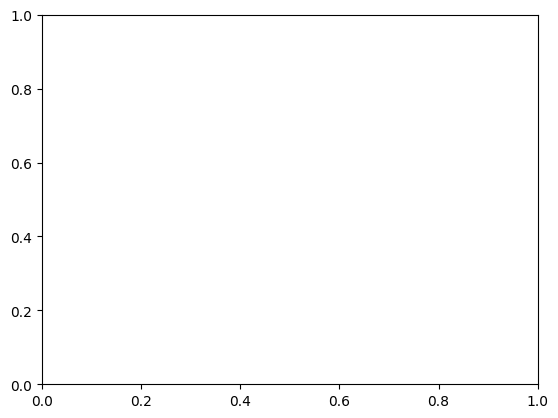

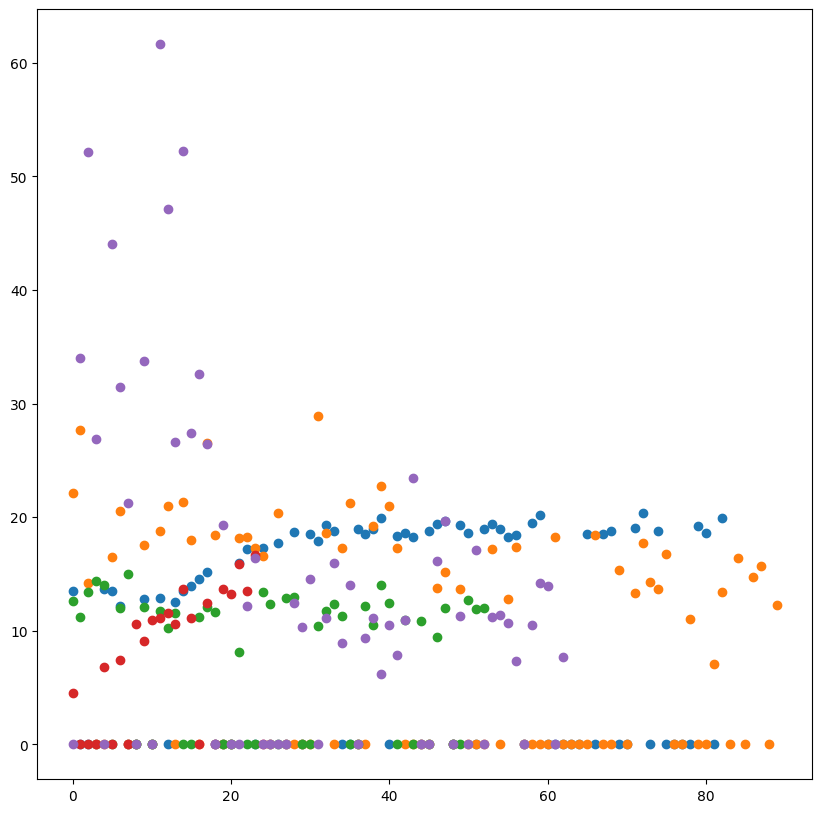

In [30]:

# print(N_0, N_T, dr)
fig, ax = plt.subplots()


def generate_data():

    v = np.random.beta(1.5, 8)

    lifetime = np.random.randint(20,100)
    x = np.arange(0, lifetime, 1)
    set_point = np.random.randint(10, 20)

    zero_inflation_rate = np.random.uniform(0.3, 0.5)

    switch_point = np.random.randint(0, max(1,lifetime-20))

    growth_type = np.random.choice(["decay", "growth"])

    if growth_type == "decay":
        starting_point = np.random.uniform(0.3, 1) * set_point
    else:
        starting_point = np.random.uniform(1, 2.5) * set_point
        # starting_point = np.random.randint(1,2)* 0.2 *set_point
    
    rate = np.random.uniform(0.05, 0.2)
    y = np.zeros(lifetime)
    y[:switch_point] = starting_point
    y[switch_point:] = lim_decay(starting_point, set_point, rate, np.arange(0,len(x[switch_point:]), 1))

    # y = zero_inf_gamma(len(y), (y**2)/v, scale=v/y, perc=zero_inflation_rate)
    y = zero_inf_gauss(len(y), y, y*v, zero_inflation_rate)


    print('params: starting_point {}, set_point {}, rate {}, switch_point {}, growth_type {}, lifetime {}, v {}'.format(starting_point, set_point, rate, switch_point, growth_type, lifetime, v))

    return x,list(y)

n_samples = 5

fig, ax = plt.subplots(1,1, figsize=(10,10), sharex=True)

for i in range(n_samples):

    x,y = generate_data()

    # plt.scatter(x, y)
    ax.scatter(x, y)
    # ax.hlines(y=N_T, xmin=0, xmax=T, color="red")
    # ax.scatter(x, np.random.poisson(lam=y))
    # plt.plot(x, np.random.gamma(shape=y, scale=v))

# ax.set(xlabel='time [days since first]', ylabel='$N_t$ [n interactions]', title='Number of interactions over time')
# ax.grid()


In [ ]:
data = [generate_data() for i in range(100)]

In [93]:
max_len = max([len(d[1]) for d in data])

In [65]:
mat = np.array([list(d[1]) + [0]*(max_len - len(d[1])) for d in data])

In [66]:
mat_norm = np.subtract(mat, mat.min(axis=1).reshape(-1,1)) / (mat.max(axis=1) - mat.min(axis=1)).reshape(-1,1)

In [ ]:
fig, ax = plt.subplots()
sns.heatmap(mat_norm, cmap="viridis")
ax.set(xlabel='time [days since first]', ylabel='user', title='Number of interactions over time')

In [95]:
activity = [i[1] for i in data]

In [98]:
[len(i) for i in activity]

[64,
 20,
 38,
 88,
 61,
 35,
 64,
 89,
 21,
 69,
 35,
 49,
 49,
 28,
 65,
 81,
 98,
 29,
 55,
 46,
 23,
 94,
 43,
 32,
 75,
 66,
 70,
 32,
 93,
 95,
 23,
 61,
 68,
 63,
 83,
 98,
 85,
 42,
 69,
 52,
 94,
 97,
 26,
 24,
 28,
 65,
 66,
 53,
 61,
 62,
 91,
 35,
 42,
 28,
 82,
 32,
 53,
 55,
 66,
 45,
 60,
 26,
 74,
 25,
 49,
 91,
 95,
 93,
 51,
 79,
 21,
 88,
 97,
 31,
 90,
 58,
 28,
 53,
 43,
 81,
 83,
 38,
 32,
 81,
 74,
 83,
 66,
 79,
 25,
 94,
 52,
 80,
 44,
 50,
 89,
 57,
 56,
 50,
 47,
 69]

In [99]:
with pm.Model() as model:
    # Model definition
    poisson_lambda = pm.Gamma("poisson_lambda", alpha=1, beta=1, shape=10)
    zero_inflation_rate = pm.Uniform("zero_inflation_rate", lower=0, upper=1, shape=10)

    # poisson = pm.ZeroInflatedPoisson("poisson", mu=poisson_lambda, psi=zero_inflation_rate, observed=activity)

    idata = pm.sample_prior_predictive(100)


    # idata = pm.sample(200)

Sampling: [poisson_lambda, zero_inflation_rate]


In [100]:
idata

Inference data with groups:
	> prior

(array([10., 10., 10.,  7.,  6., 15.,  9.,  8., 10., 15.]),
 array([70. , 72.9, 75.8, 78.7, 81.6, 84.5, 87.4, 90.3, 93.2, 96.1, 99. ]),
 <BarContainer object of 10 artists>)

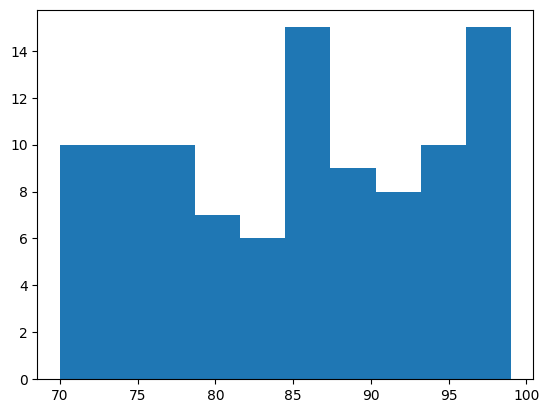

In [233]:
plt.hist([len(d[1]) for d in data])

(array([305.,   5.,  32., 101., 171., 169., 109.,  62.,  31.,  15.]),
 array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.]),
 <BarContainer object of 10 artists>)

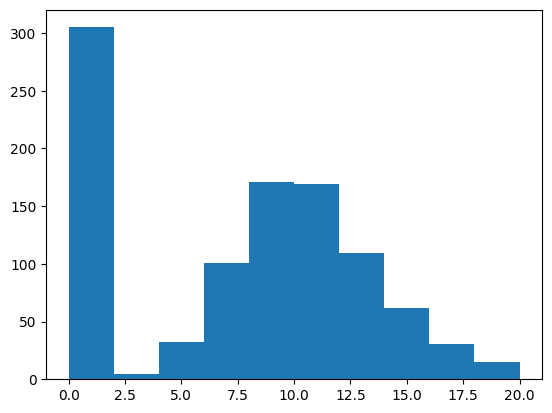

In [209]:
plt.hist(zero_inf_poisson(10, 1000, 0.7))

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Parameters
num_users = 100
days = 365

# Time array (days)
time = np.arange(days)

In [24]:
# Function to generate user activity data
def generate_user_activity(user_type, days, zero_prob=0.3):
    if user_type == "regular":
        activity = np.random.poisson(lam=5, size=days) * (np.random.rand(days) < (1-zero_prob)) * 1  # Constant activity
        return activity
    elif user_type == "spiky":
        activity = np.random.poisson(lam=2, size=days).astype(float)
        spikes = np.random.normal(loc=10, scale=5, size=days)
        spikes = np.clip(spikes, 0, None)
        
        activity += (np.random.rand(days) < 0.1) * spikes  # 10% chance of a spike
        return activity
    elif user_type == "churn":
        initial_activity = np.random.poisson(lam=5, size=days)
        decay = np.exp(-np.linspace(0, 3, days))  # Exponential decay
        return (initial_activity * decay).astype(int)
    elif user_type == "returning":
        activity = np.random.poisson(lam=5, size=days)
        inactive_period = np.random.randint(30, 180)
        activity[inactive_period:inactive_period + 60] = 0  # 60 days inactivity
        return activity
    else:
        return np.zeros(days)


NameError: name 'ax' is not defined

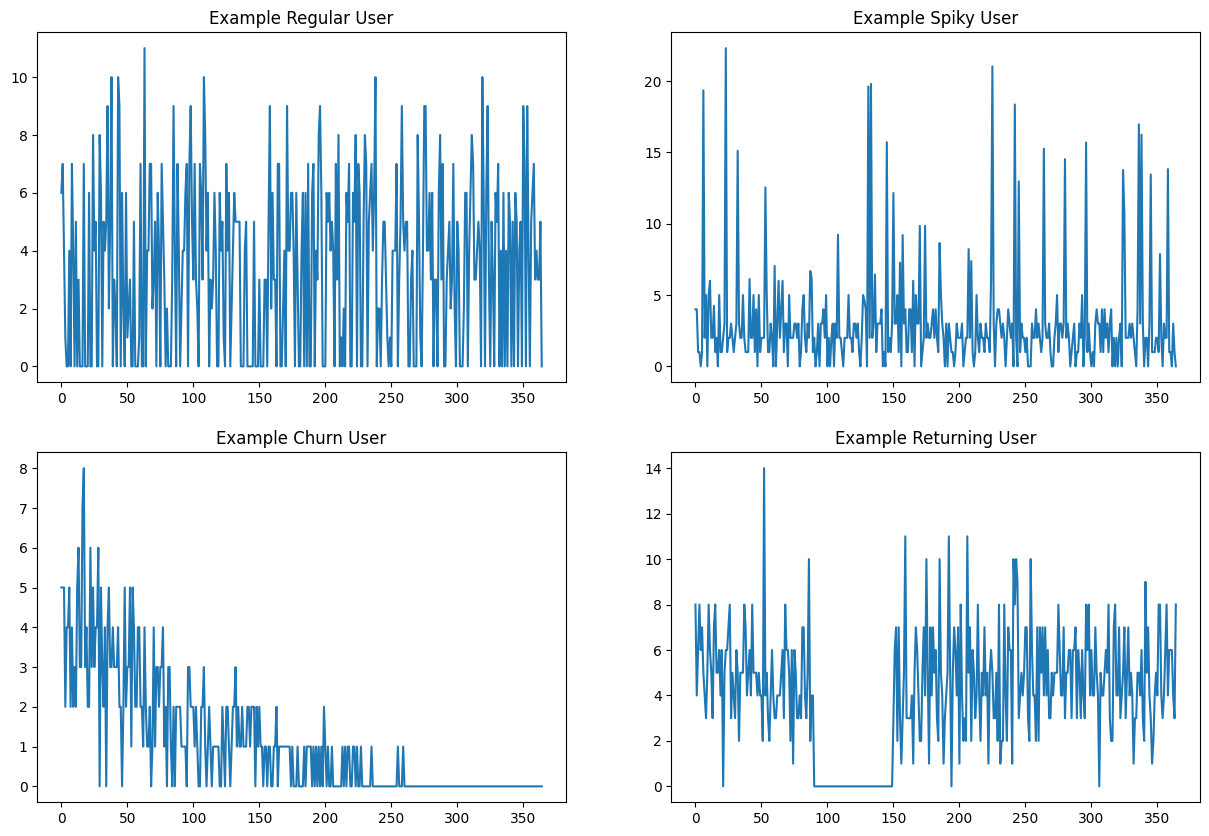

In [26]:
# Generate data for all users
user_types = ["regular", "spiky", "churn", "returning"]
data = []

ut_sampled = []
for i in range(num_users):
    user_type = np.random.choice(user_types)
    ut_sampled.append(user_type)
    activity = generate_user_activity(user_type, days)
    data.append(activity)

# Convert to DataFrame
df = pd.DataFrame(data, index=[f"User_{i+1}" for i in range(num_users)], columns=time)
df["user_type"] = ut_sampled

# Plot example users
plt.figure(figsize=(15, 10))
for i, user_type in enumerate(user_types, 1):
    plt.subplot(2, 2, i)
    example_user = df[df["user_type"] == user_type].sample(1).drop(columns="user_type").values[0]
    plt.plot(time, example_user)
    plt.title(f"Example {user_type.capitalize()} User")

ax.set(xlabel='time [days since first]', ylabel='$N_t$ [n interactions]', title='Number of interactions over time')
ax.grid()
plt.tight_layout()
plt.show()

In [4]:
df

,0,1,2,3,4,5,6,7,8,9,...,355,356,357,358,359,360,361,362,363,364
User_1,6.0,5.0,5.00000,6.0,6.0,3.000000,3.000000,2.000000,4.0,6.0,...,7.0,6.0,8.0,6.0,3.0,9.000000,3.00000,3.000000,4.000000,8.000000
User_2,3.0,2.0,2.00000,3.0,3.0,4.000000,8.000000,8.000000,2.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.000000
User_3,8.0,0.0,9.00000,8.0,3.0,6.000000,8.000000,3.000000,2.0,2.0,...,9.0,3.0,4.0,7.0,9.0,7.000000,3.00000,3.000000,4.000000,8.000000
User_4,1.0,1.0,2.00000,0.0,2.0,14.210191,16.276782,1.000000,0.0,2.0,...,2.0,2.0,2.0,2.0,2.0,9.278958,2.00000,11.880745,15.317031,3.000000
User_5,4.0,9.0,7.00000,5.0,2.0,2.000000,5.000000,1.000000,4.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
User_96,0.0,0.0,15.86032,3.0,0.0,0.000000,1.000000,15.045875,2.0,3.0,...,4.0,2.0,0.0,2.0,1.0,2.000000,5.90881,2.000000,2.000000,3.000000
User_97,6.0,7.0,6.00000,3.0,8.0,5.000000,4.000000,3.000000,5.0,6.0,...,7.0,4.0,8.0,5.0,3.0,6.000000,7.00000,3.000000,5.000000,6.000000
User_98,3.0,4.0,4.00000,5.0,2.0,4.000000,3.000000,8.000000,6.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.000000
User_99,5.0,6.0,5.00000,6.0,6.0,5.000000,5.000000,4.000000,7.0,7.0,...,2.0,5.0,7.0,5.0,1.0,5.000000,8.00000,6.000000,4.000000,8.000000
